In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Dropping the columns which are not adding no value

In [7]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis = 1, inplace = True)

In [8]:
df.shape

(1470, 31)

'DailyRate', 'HourlyRate', 'MonthlyRate' all these equalise to Monthly salary. So drop these values for now

In [9]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [10]:
df.shape

(1470, 28)

### Applying Label Encoding for converting the labels into numeric form

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_new=df.apply(label_encoder.fit_transform)

In [12]:
df_new.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [15]:
df_new['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

class imbalance problem exists

<AxesSubplot:xlabel='Attrition', ylabel='count'>

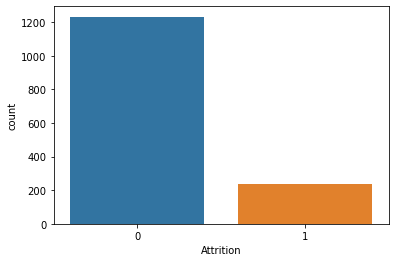

In [14]:
sns.countplot(df_new['Attrition'])

### Resampling

In [17]:
df1=df_new
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,2,0,1,1,1,0,2,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,1,7,0,1,2,1,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,1,1,1,4,3,1,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,1,2,3,1,3,0,2,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,1,1,0,3,0,1,2,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,1,22,1,3,2,1,3,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,1,5,0,3,3,1,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,1,3,2,1,1,1,3,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,2,1,2,3,3,1,1,...,0,3,0,17,3,1,9,6,0,8


In [18]:
Attrition_count_0, Attrition_count_1 = df1['Attrition'].value_counts()
print('Attrition_count_0, :',Attrition_count_0, '\n Attrition_count_1 : ', Attrition_count_1)

Attrition_count_0, : 1233 
 Attrition_count_1 :  237


In [19]:
Attrition_0 = df1[df1['Attrition'] == 0]
Attrition_1 = df1[df1['Attrition'] == 1]

# print the shape of the class
print('Attrition 0:', Attrition_0.shape)
print('Attrition 1:', Attrition_1.shape)

Attrition 0: (1233, 28)
Attrition 1: (237, 28)


In [20]:
Attrition_1_over = Attrition_1.sample(Attrition_count_0, replace=True)

df2 = pd.concat([Attrition_1_over, Attrition_0], axis=0)

print("total class of 1 and 0: \n",df2['Attrition'].value_counts())

total class of 1 and 0: 
 1    1233
0    1233
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

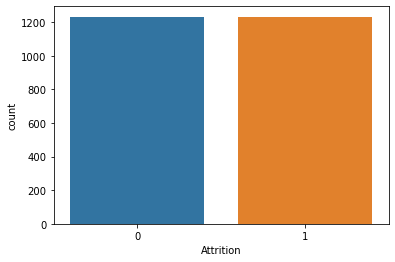

In [21]:
sns.countplot(df2['Attrition'])

data is now balanced

In [54]:
df2.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,17.556772,0.500000,1.596107,1.296026,8.870641,1.886861,2.292782,1.636659,0.620032,1.676805,...,0.148418,1.673966,0.670722,10.065288,2.728305,1.721411,6.145174,3.641525,2.081509,3.559205
std,9.536916,0.500101,0.638750,0.543410,8.233897,1.018975,1.375328,1.122957,0.485477,0.739336,...,0.355586,1.100225,0.857050,7.700017,1.296268,0.750283,5.944573,3.541416,3.206270,3.486389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,5.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,16.000000,0.500000,2.000000,1.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,2.000000,0.000000,8.000000,3.000000,2.000000,5.000000,2.000000,1.000000,2.000000
75%,24.000000,1.000000,2.000000,2.000000,15.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,0.000000,3.000000,1.000000,13.000000,3.000000,2.000000,9.000000,7.000000,2.000000,7.000000
max,42.000000,1.000000,2.000000,2.000000,28.000000,4.000000,5.000000,3.000000,1.000000,3.000000,...,1.000000,3.000000,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


### Plotting Distribution Plot for checking Data distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

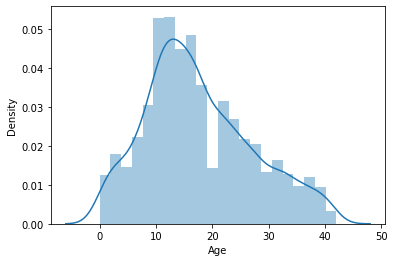

In [22]:
sns.distplot(df2['Age'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

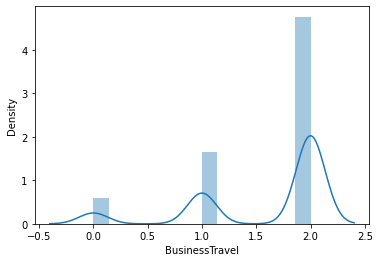

In [23]:
sns.distplot(df2['BusinessTravel'])

<AxesSubplot:xlabel='Department', ylabel='Density'>

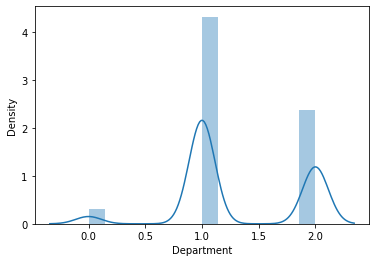

In [24]:
sns.distplot(df2['Department'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

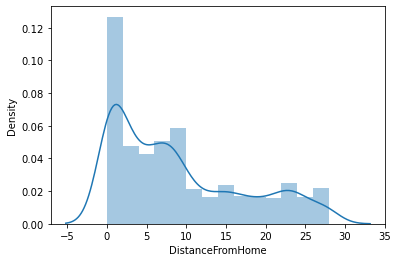

In [25]:
sns.distplot(df2['DistanceFromHome'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

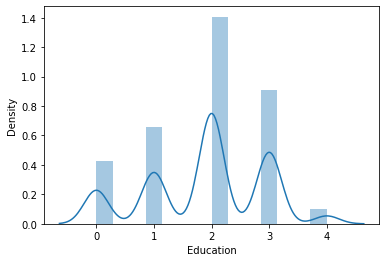

In [26]:
sns.distplot(df2['Education'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

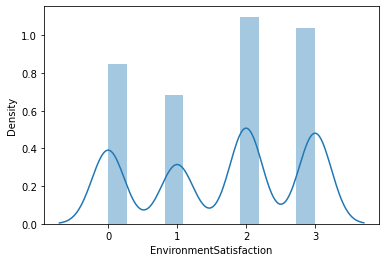

In [27]:
sns.distplot(df2['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

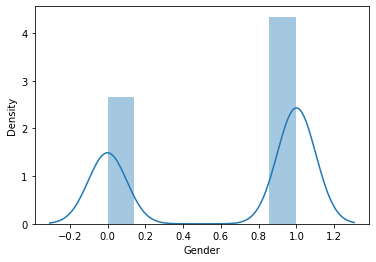

In [28]:
sns.distplot(df2['Gender'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

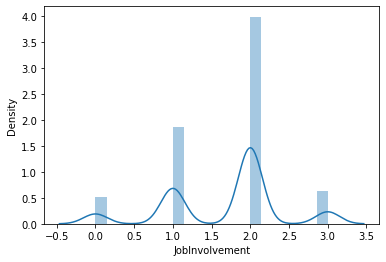

In [29]:
sns.distplot(df2['JobInvolvement'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

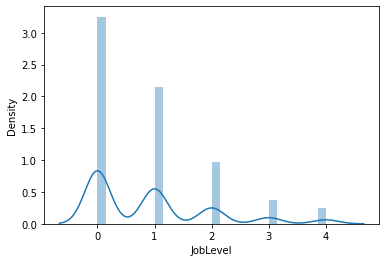

In [30]:
sns.distplot(df2['JobLevel'])

<AxesSubplot:xlabel='JobRole', ylabel='Density'>

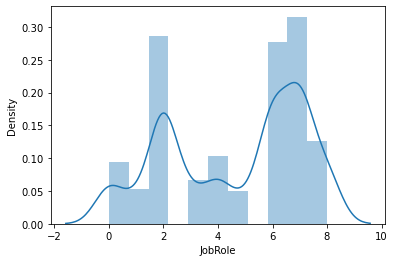

In [31]:
sns.distplot(df2['JobRole'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

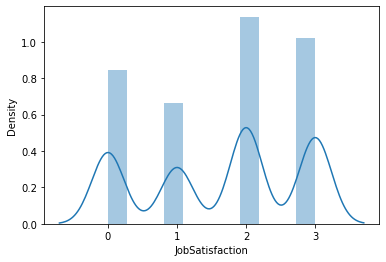

In [32]:
sns.distplot(df2['JobSatisfaction'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

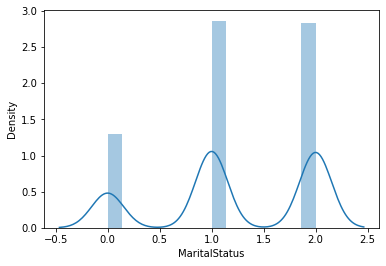

In [33]:
sns.distplot(df2['MaritalStatus'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

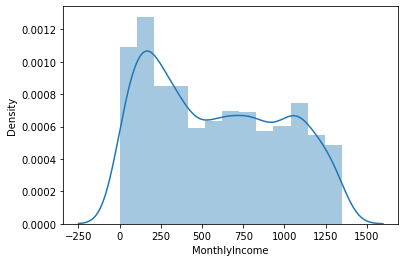

In [34]:
sns.distplot(df2['MonthlyIncome'])

<AxesSubplot:xlabel='OverTime', ylabel='Density'>

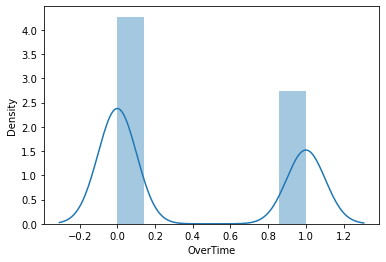

In [35]:
sns.distplot(df2['OverTime'])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

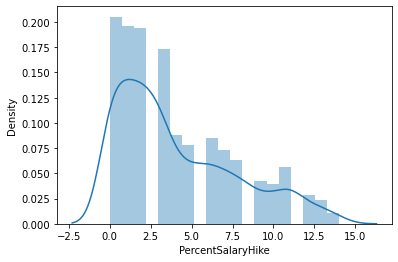

In [36]:
sns.distplot(df2['PercentSalaryHike'])

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

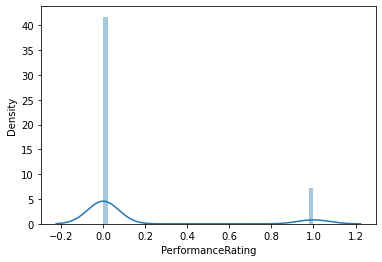

In [37]:
sns.distplot(df2['PerformanceRating'])

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

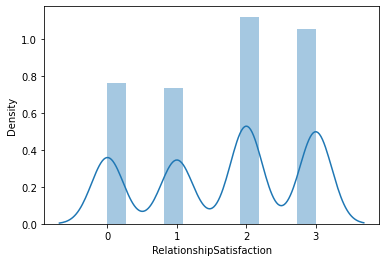

In [38]:
sns.distplot(df2['RelationshipSatisfaction'])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

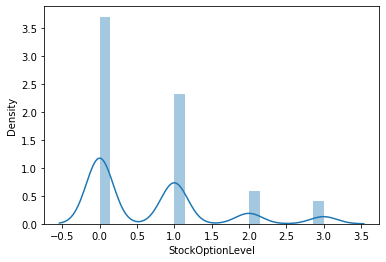

In [39]:
sns.distplot(df2['StockOptionLevel'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

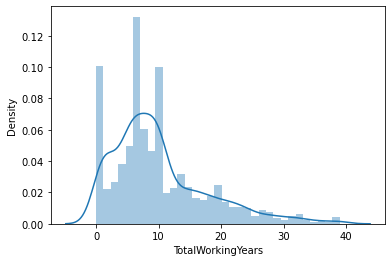

In [40]:
sns.distplot(df2['TotalWorkingYears'])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

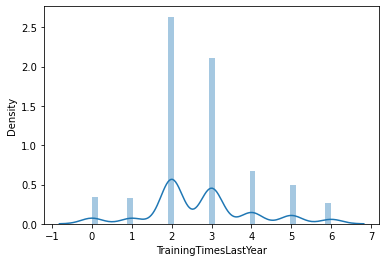

In [41]:
sns.distplot(df2['TrainingTimesLastYear'])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

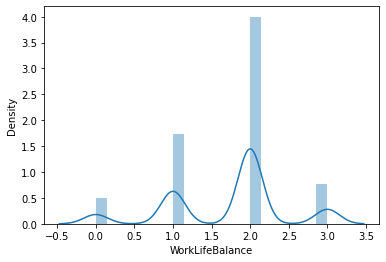

In [42]:
sns.distplot(df2['WorkLifeBalance'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

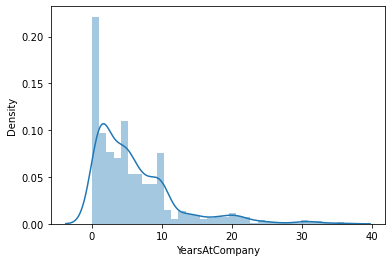

In [43]:
sns.distplot(df2['YearsAtCompany'])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

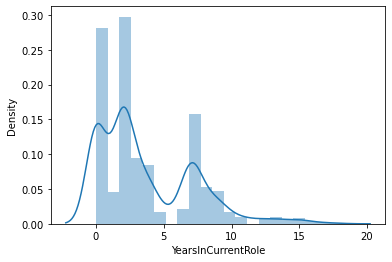

In [44]:
sns.distplot(df2['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

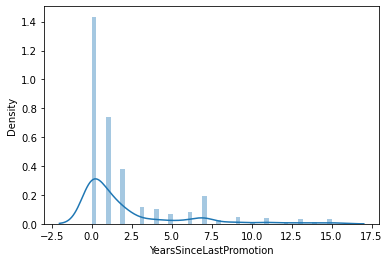

In [45]:
sns.distplot(df2['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

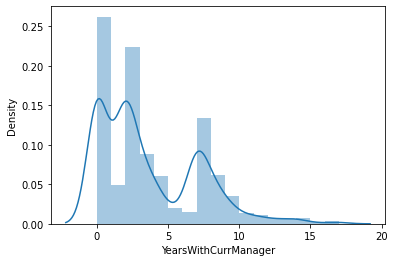

In [46]:
sns.distplot(df2['YearsWithCurrManager'])

### Plotting Boxplot to find the outliers

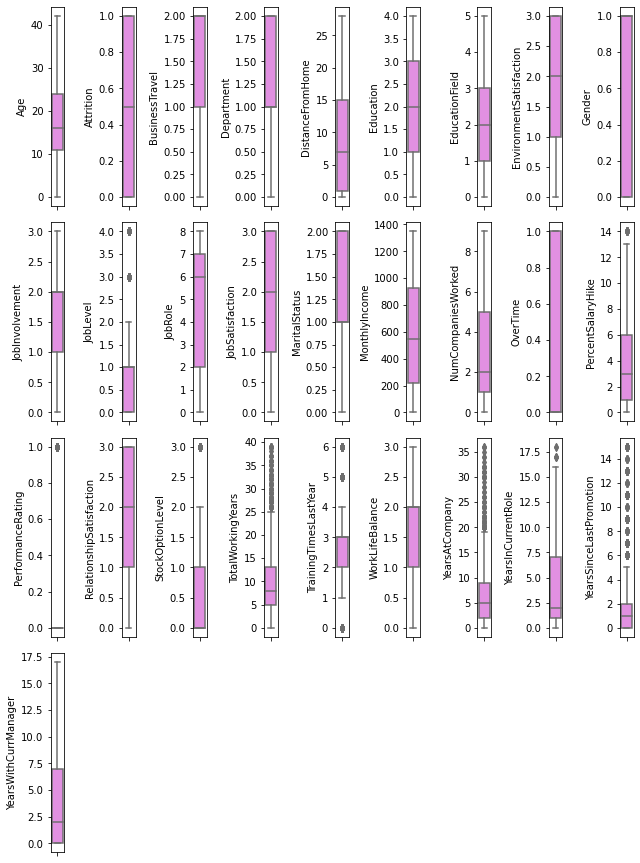

In [53]:
collist=df2.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df2[collist[i]], color='violet', orient='x')
    plt.tight_layout()

JobLevel,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearsWithCurrManager columns have outliers and need to be handled

In [55]:
cor=df2.corr()
cor

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.210222,0.032934,-0.003322,-0.002213,0.204151,-0.084529,-0.002202,0.042469,0.074896,...,-0.011697,0.103641,0.118677,0.687378,-0.033175,-0.047426,0.380433,0.306128,0.263525,0.278554
Attrition,-0.210222,1.000000,-0.017780,0.092553,0.116006,-0.039406,0.044236,-0.119914,0.054305,-0.126726,...,-0.013688,-0.054560,-0.203497,-0.233508,-0.080727,-0.079467,-0.203461,-0.237993,-0.047691,-0.231860
BusinessTravel,0.032934,-0.017780,1.000000,-0.009535,-0.058224,0.026997,0.019677,0.022686,-0.024134,0.029291,...,-0.050324,-0.004462,0.002252,0.060214,0.006071,-0.001248,0.025278,0.032274,0.000630,0.005095
Department,-0.003322,0.092553,-0.009535,1.000000,0.022887,0.018017,0.007746,-0.016461,-0.036327,-0.017234,...,-0.028019,-0.018996,-0.053681,0.005365,0.047996,0.041164,0.025622,0.065705,0.053902,0.026291
DistanceFromHome,-0.002213,0.116006,-0.058224,0.022887,1.000000,0.032827,-0.031797,-0.018687,-0.005197,0.026983,...,0.063923,0.010299,-0.000002,-0.006477,-0.031915,-0.040508,-0.025616,-0.022613,-0.005240,-0.007004
Education,0.204151,-0.039406,0.026997,0.018017,0.032827,1.000000,-0.061170,-0.021049,0.021313,0.075296,...,-0.032012,0.026791,0.059056,0.176995,-0.046316,-0.017366,0.130631,0.112306,0.107003,0.125387
EducationField,-0.084529,0.044236,0.019677,0.007746,-0.031797,-0.061170,1.000000,0.078626,0.055495,-0.033774,...,0.006505,-0.008741,-0.042767,-0.042105,0.061477,0.047233,-0.027282,0.002317,-0.019398,-0.003701
EnvironmentSatisfaction,-0.002202,-0.119914,0.022686,-0.016461,-0.018687,-0.021049,0.078626,1.000000,0.003385,0.022192,...,-0.001033,0.042316,-0.032049,-0.031974,-0.000401,-0.016667,0.018783,0.037010,0.055777,0.005393
Gender,0.042469,0.054305,-0.024134,-0.036327,-0.005197,0.021313,0.055495,0.003385,1.000000,0.014881,...,-0.018640,0.053550,0.039455,-0.005516,-0.029382,-0.044592,-0.034998,-0.043627,-0.019710,-0.045546
JobInvolvement,0.074896,-0.126726,0.029291,-0.017234,0.026983,0.075296,-0.033774,0.022192,0.014881,1.000000,...,-0.047390,0.070395,0.049660,0.033139,-0.046792,-0.013190,0.009942,0.021582,0.021043,0.060387


<AxesSubplot:>

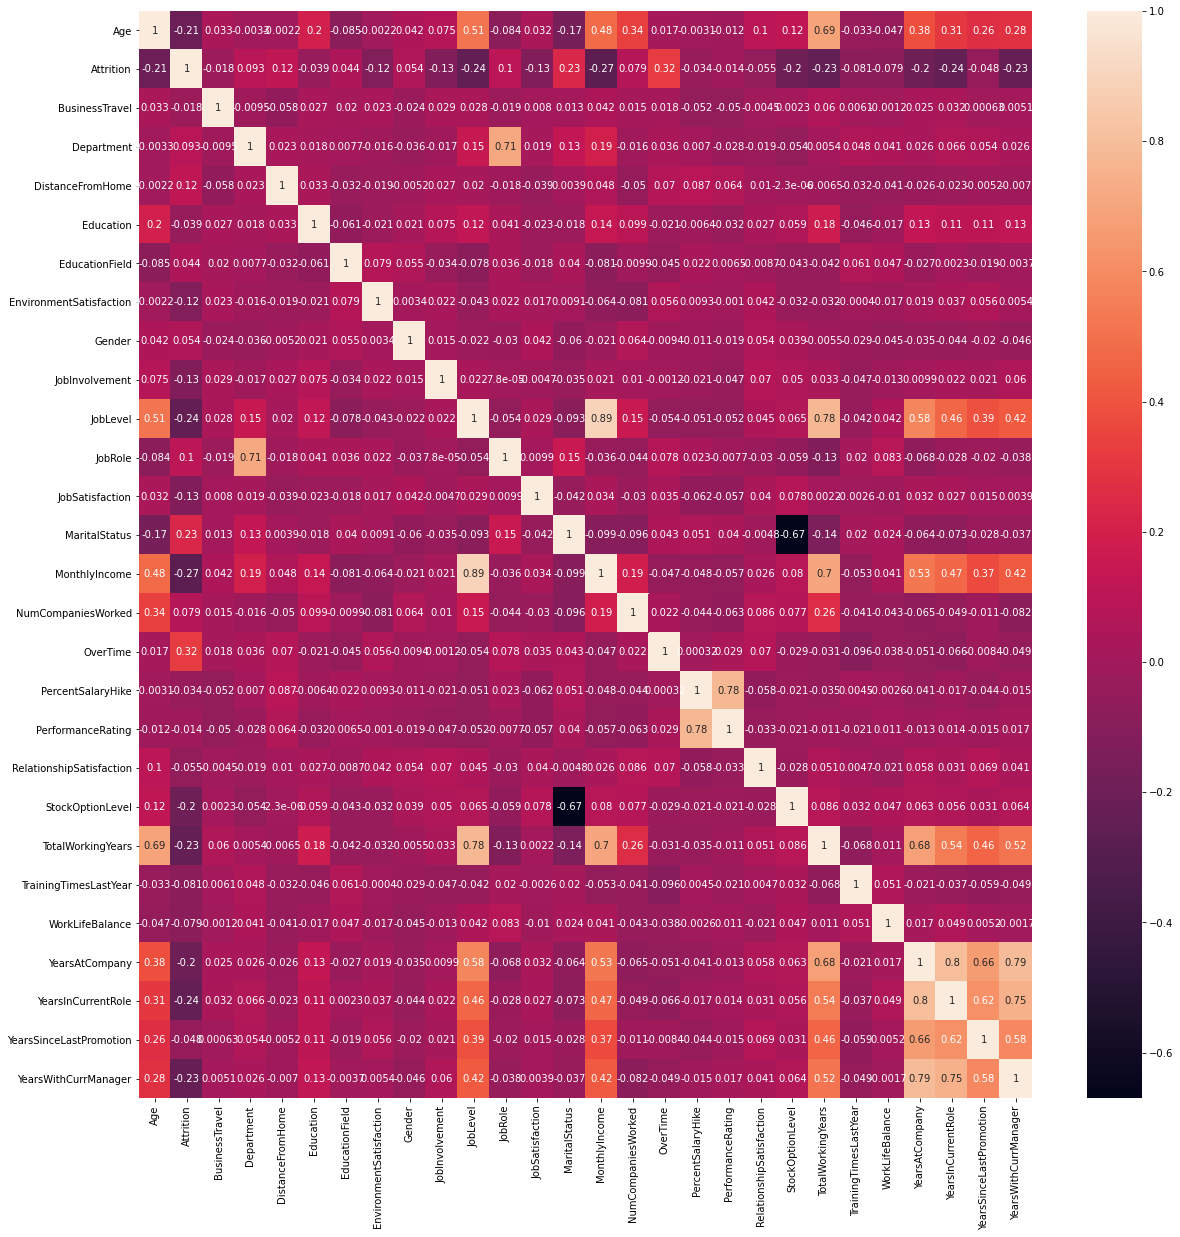

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='g')

Job level and total working years are highly correlated.

Monthly Income and total working years are highly correlated.

Performance rating and percentage salary hike are highly correlated.

Years in current role and years at company are highly correlated.

Years with current manager and years at company are highly correlated.

### Removal of Outliers

In [58]:
from scipy.stats import zscore

z=np.abs(zscore(df2))

df3=df2[(z<3).all(axis=1)]

In [59]:
df3.shape

(2338, 28)

In [60]:
df2.shape

(2466, 28)

In [61]:
Loss_percentage=(2466-2338)/2466*100
print(Loss_percentage)

5.190592051905921


Outlier removal is deleting 5% data. So proceeding with the new dataset.

### Removing Skewnesss

In [62]:
df3.skew()

Age                         0.545329
Attrition                  -0.032532
BusinessTravel             -1.305354
Department                  0.049807
DistanceFromHome            0.799486
Education                  -0.293454
EducationField              0.537983
EnvironmentSatisfaction    -0.226219
Gender                     -0.516258
JobInvolvement             -0.501365
JobLevel                    1.234441
JobRole                    -0.395834
JobSatisfaction            -0.262063
MaritalStatus              -0.371273
MonthlyIncome               0.284262
NumCompaniesWorked          0.924186
OverTime                    0.436291
PercentSalaryHike           0.833230
PerformanceRating           1.955554
RelationshipSatisfaction   -0.255782
StockOptionLevel            1.228138
TotalWorkingYears           1.080325
TrainingTimesLastYear       0.467848
WorkLifeBalance            -0.490468
YearsAtCompany              1.238184
YearsInCurrentRole          0.872534
YearsSinceLastPromotion     1.808566
Y

### Variance Inflation Factor Calculation

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif_data = pd.DataFrame()
vif_data["feature"] = df3.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(df3.values, i)
                            for i in range(len(df3.columns))]
print(vif_data)

### Dividing the data into independent(x) and dependent(y) variables

In [65]:
x=df3.drop('Attrition',axis=1)
y=df3['Attrition']

### Scaling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.9444444444444444 On random_state 696


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=696)

### Normalisation

In [70]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.07142857 0.5        0.5        ... 0.14285714 0.18181818 0.14285714]
 [0.66666667 1.         0.5        ... 0.14285714 0.18181818 0.14285714]
 [0.11904762 1.         0.5        ... 0.         0.         0.        ]
 ...
 [0.4047619  1.         1.         ... 0.57142857 0.         0.64285714]
 [0.4047619  1.         0.5        ... 0.28571429 0.         0.28571429]
 [0.38095238 1.         1.         ... 0.14285714 0.         0.07142857]]


In [71]:
print(new_xtest)

[[0.30952381 1.         0.5        ... 0.14285714 0.54545455 0.5       ]
 [0.0952381  1.         0.5        ... 0.14285714 0.18181818 0.14285714]
 [0.42857143 0.         0.5        ... 0.28571429 0.         0.14285714]
 ...
 [0.38095238 0.         0.5        ... 0.14285714 0.27272727 0.        ]
 [0.26190476 0.5        0.5        ... 0.5        0.63636364 0.5       ]
 [0.30952381 1.         0.5        ... 0.14285714 0.54545455 0.5       ]]


In [72]:
print(new_xtrain)

[[0.07142857 0.5        0.5        ... 0.14285714 0.18181818 0.14285714]
 [0.66666667 1.         0.5        ... 0.14285714 0.18181818 0.14285714]
 [0.11904762 1.         0.5        ... 0.         0.         0.        ]
 ...
 [0.4047619  1.         1.         ... 0.57142857 0.         0.64285714]
 [0.4047619  1.         0.5        ... 0.28571429 0.         0.28571429]
 [0.38095238 1.         1.         ... 0.14285714 0.         0.07142857]]


### Model Creation

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [100]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred_dtc=DTC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       318
           1       0.93      1.00      0.96       384

    accuracy                           0.96       702
   macro avg       0.96      0.95      0.95       702
weighted avg       0.96      0.96      0.96       702



In [101]:
print('r2 score:', r2_score(y_test,pred_dtc))

r2 score: 0.8045400943396226


In [94]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred_rfc=RFC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       318
           1       0.93      1.00      0.96       384

    accuracy                           0.96       702
   macro avg       0.96      0.95      0.95       702
weighted avg       0.96      0.96      0.96       702



In [95]:
print('r2 score:', r2_score(y_test,pred_rfc))

r2 score: 0.9310141509433962


In [96]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(new_xtrain, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [97]:
y_pred= classifier.predict(new_xtest)

In [98]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred_sv=SV.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       318
           1       0.93      1.00      0.96       384

    accuracy                           0.96       702
   macro avg       0.96      0.95      0.95       702
weighted avg       0.96      0.96      0.96       702



In [99]:
print('r2 score:', r2_score(y_test,pred_sv))

r2 score: 0.5343455188679245


In [102]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
pred_gbc = GBC.predict(new_xtest)
gbc=classification_report(y_test,GBCpred)
print(gbc)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       318
           1       0.91      0.91      0.91       384

    accuracy                           0.90       702
   macro avg       0.90      0.90      0.90       702
weighted avg       0.90      0.90      0.90       702



In [103]:
print('r2 score:', r2_score(y_test,pred_gbc))

r2 score: 0.6090801886792452


### Finding Cross Validation Score    

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9208660480609089


In [83]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.975191712879079


In [84]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.6313182891341349


In [85]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.8909277256172331


Difference between Model Accuracy and Cross Validation score

DTC= 96-92 = 4

RFC= 96-98  = -2

SV= 96-63 = 33

GBC= 90-89 = 1

Random Forest Classifier is showing least difference. So proceeding with same for final model

### Hyper Parameter Tuning 

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [105]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028696DF4A90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028696DF4850>})

In [106]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.9751953732681784


### Final Model Creation

In [127]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth = None, max_features= 3, min_samples_leaf = 3)
Final_model.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred_rfc)
print(acc*100)

98.29059829059828


### Confusion Matrix

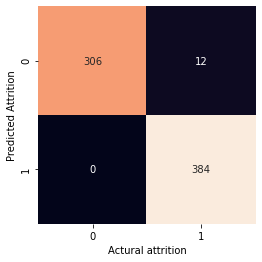

In [126]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_rfc)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       318
           1       0.97      1.00      0.98       384

    accuracy                           0.98       702
   macro avg       0.98      0.98      0.98       702
weighted avg       0.98      0.98      0.98       702



### Evaluating the Predictions

In [122]:
preds=pd.DataFrame([Final_model.predict(new_xtest)[:],pred_rfc[:]],index=["Predicted","Actual"])
preds

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
Predicted,1,0,0,0,1,1,1,0,1,1,...,0,1,1,1,0,0,0,1,1,1
Actual,1,0,0,0,1,1,1,0,1,1,...,0,1,1,1,0,0,0,1,1,1


Predicted = Actual

### Saving the Best Model

In [129]:
import joblib
joblib.dump(Final_model,"HR_Attrition_Prediction_Project.pkl")

['HR_Attrition_Prediction_Project.pkl']